# ECE 5554 Computer Vision Final Project

The goal is to correctly classify whether the X-Ray images are Normal or Pneumonia. Computer Vision techniques will be applied and will be trained using Convolutional Neural Networks. The implementation of this project will be provided in this notebook. 

Background Information about the Image Classificaion of X-Rays can be found in the html link provided in the Project Proposal. 

After implementation of the CNN function, the model will be tested for accuracy.


## 1. Environment Set up. 
Before loading the dataset and images, the environment must be setup for the Google Colab Notebook.

Additional Steps Involved.


a.   Mount Google Drive into Notebook.





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


a1. Change to the shared ECE5554 Computer Vision Final Project Folder.

In [4]:
import os
os.chdir('/content/drive/Shared drives/ECE5554 Computer Vision Final Project')

b. Import Required Library Modules.

In [5]:
# Import library modules
import sys
import cv2 # OpenCV library
from PIL import Image # Python Imaging Library
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random
import skimage.data
from sklearn import random
from math import log

## 2. Data Processing & Preparation.
This involves processing each file path and load the images for the file paths. The datasets will be loaded from Kaggle. Therefore a kaggle.json file will need to be provided. Each image will be stored in a list based on whether each image is a training, testing, and validation image.



Two functions convert_to_img() and rearrange_dataset() will convert image paths into images and reshuffle the image dataset.

In [6]:
def convert_to_img(path, label):
    '''Take image path, convert to image, and store in list with classification 
    of whether dataset is normal or opaque (pneumonia). 
    
    path: Path to image files
    label: 'normal or opaque
    Returns: 
    new_img: list of each image with classification.

    '''

    # Make list of file names.
    filelist = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    filelist = [i for i in filelist if i is not None]
    
    # Selecting 1/4, 1/2, or all of the images at random.
    #len_half_filelist = len(filelist)//4
    #len_half_filelist = len(filelist)//2
    len_half_filelist = len(filelist)
    print("len_half_filelist: ", len_half_filelist)
    half_filelist = []
    count = 0
    while (count < len_half_filelist): 
      half_filelist.append(random.choice(filelist))
      count+=1

    # Label codes 
    label_code = -1  # Default Code.
    if label == 'normal':
      label_code = 0
    elif label == 'opaque':
      label_code = 1
      
    # Read image files and store each image into list.
    new_img = []
    for file in half_filelist: 
      image_path = path + "/" +  file        # reading the image
      print("image_path: ", image_path)  # Print images being processed.
      img = imread(image_path, as_gray=True)
      if type(img) != None: 
        img = cv2.resize(img, (80, 80)) # Images will be downscaled to 80x80
        img = img/255.0   # Normalizing the pixel values
        img = img.astype('float32') # Convert type of pixel to float 32
        new_img.append([img, label_code])  # Append image and label into list.

    return new_img

In [7]:
def rearrange_dataset(img_dataset):
  ''' Split dataset into images and labels.
  img_dataset: image dataset with images and labels combined.
  Returns: 
  dataset_x: array of images
  dataset_y: array of labels
  '''
  random.shuffle(img_dataset)
  dataset_x = [img_dataset[i][0] for i in range(len(img_dataset))]
  dataset_y = [img_dataset[i][1] for i in range(len(img_dataset))]
  dataset_x = np.array(dataset_x)
  dataset_y = np.array(dataset_y)
  dataset_x.shape
  return dataset_x, dataset_y

Preprocessing image dataset will start here. Note Kaggle dataset will be used. 

Streaming output truncated to the last 5000 lines.
image_path:  content/drive/My Drive/train/normal/IM-0750-0001.jpeg
image_path:  content/drive/My Drive/train/normal/IM-0612-0001-0001.jpeg
image_path:  content/drive/My Drive/train/normal/IM-0237-0001.jpeg
image_path:  content/drive/My Drive/train/normal/NORMAL2-IM-0727-0001.jpeg
image_path:  content/drive/My Drive/train/normal/IM-0338-0001.jpeg
image_path:  content/drive/My Drive/train/normal/IM-0650-0001-0002.jpeg
image_path:  content/drive/My Drive/train/normal/NORMAL2-IM-0384-0001.jpeg
image_path:  content/drive/My Drive/train/normal/NORMAL2-IM-0648-0001.jpeg
image_path:  content/drive/My Drive/train/normal/IM-0581-0001.jpeg
image_path:  content/drive/My Drive/train/normal/IM-0502-0001.jpeg
image_path:  content/drive/My Drive/train/normal/IM-0386-0001.jpeg
image_path:  content/drive/My Drive/train/normal/IM-0724-0001.jpeg
image_path:  content/drive/My Drive/train/normal/NORMAL2-IM-0950-0001.jpeg
image_path:  content/drive/My Drive/

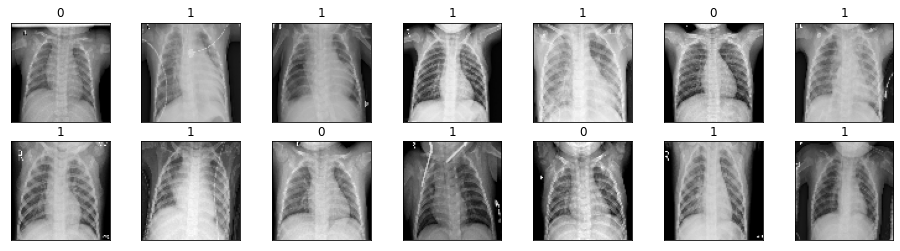

train_x.shape[0]:  4192
train_x.shape[1]:  1
train_x.shape[2]:  80
train_x.shape:  (4192, 1, 80, 80)
train_y.shape:  (4192,)
len_half_filelist:  234
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0058-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0283-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0102-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0066-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0271-0001.jpeg
image_path:  content/drive/My Drive/test/normal/IM-0017-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0300-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0374-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0019-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0333-0001.jpeg
image_path:  content/drive/My Drive/test/normal/NORMAL2-IM-0171-0001.jpeg
image_path:  content/drive/My Drive/test/norm

In [8]:
# Uncomment this section only if kaggle.json file hasn't been utilized.
'''! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d pcbreviglieri/pneumonia-xray-images

import zipfile

zf = "pneumonia-xray-images.zip"
target_dir = "content/drive/My Drive"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

print("uploaded_data: ", uploaded_data)
print(type(uploaded_data))
print(uploaded_data.keys())
print(uploaded_data.values())
'''

# Preprocessing Training, Validation, and Testing datasets.
train_normal_path = 'content/drive/My Drive/train/normal'
train_dataset_normal = convert_to_img(train_normal_path, "normal")
train_opaque_path = 'content/drive/My Drive/train/opacity'
train_dataset_opaque = convert_to_img(train_opaque_path, "opaque")
train_dataset = train_dataset_normal + train_dataset_opaque
train_x, train_y = rearrange_dataset(train_dataset)

val_normal_path = 'content/drive/My Drive/val/normal'
val_dataset_normal = convert_to_img(val_normal_path, 'normal')
val_opaque_path = 'content/drive/My Drive/val/opacity'
val_dataset_opaque = convert_to_img(val_opaque_path, 'opaque')
val_dataset = val_dataset_normal + val_dataset_opaque
val_x, val_y = rearrange_dataset(val_dataset)


test_normal_path = 'content/drive/My Drive/test/normal'
test_dataset_normal = convert_to_img(test_normal_path, "normal")
test_opaque_path = 'content/drive/My Drive/test/opacity'
test_dataset_opaque = convert_to_img(test_opaque_path, "opaque")
test_dataset = test_dataset_normal + test_dataset_opaque
test_x, test_y = rearrange_dataset(test_dataset)

# Visualizing X-Rays using randomly selected images.
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(16, 4))
indices = np.random.choice(len(train_x), 14)
counter = 0

for i in range(2):
    for j in range(7):
        axes[i,j].set_title(train_y[indices[counter]])
        axes[i,j].imshow(train_x[indices[counter]], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        counter += 1
plt.show()

# Check shapes of images and their labels.
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)
train_x = train_x.reshape(train_x.shape[0], 1, train_x.shape[1], train_x.shape[2])
print("train_x.shape[0]: ",train_x.shape[0])
print("train_x.shape[1]: ",train_x.shape[1])
print("train_x.shape[2]: ",train_x.shape[2])

# shape of training data
train_x.shape, train_y.shape
print("train_x.shape: ", train_x.shape)
print("train_y.shape: ", train_y.shape)

val_x = val_x.reshape(val_x.shape[0], 1, val_x.shape[1], val_x.shape[2])

val_y = val_y.astype(int);
val_x.shape, val_y.shape


# generating predictions for test set
test_normal_path = 'content/drive/My Drive/test/normal'
test_dataset_normal = convert_to_img(test_normal_path, "normal")
test_opaque_path = 'content/drive/My Drive/test/opacity'
test_dataset_opaque = convert_to_img(test_opaque_path, "opaque")
test_dataset = test_dataset_normal + test_dataset_opaque
test_x, test_y = rearrange_dataset(test_dataset)
test_x = test_x.reshape(test_x.shape[0], 1, test_x.shape[1], test_x.shape[2])
test_x = test_x.astype(int);


## 3. Create CNN function.

After taking all files in path and converting to list of images and labels classifying each image using 0's and 1's (Normal and Pneumonia respectively), the CNN model is created. Note that the CNN model is implemented using concepts taken from the course such as Cross-correlation and convolution. No libraries were used in this implementation of the CNN model.

In [9]:
# Functions

def load_image(filename):
  img = np.asarray(Image.open(filename))
  img = img.astype("float32")/255.0
  #img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
  #img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
  return img

def show_image(img):
  fig = plt.figure()
 # fig.set_size_inches(16, 12)
  plt.imshow(img,cmap='gray')

def downscale(img_scale, desired_size):   # input size/scale = desired size   ==> input size/desired size = scale
  rows=len(img_scale)
  cols=len(img_scale[1])
  scalerow = int(rows/desired_size)       # Determines scale factor for rows from original to destination size
  scalecol = int(cols/desired_size)       # Determines scale factor for cols from original to destination size
  downscale_height = desired_size         # Destination size
  downscale_width = desired_size          # Destination size
  img_smaller = np.zeros((downscale_height, downscale_width))   # Zero array of destination image at desired size

  i = 0
  while i < downscale_height:                       
    j = 0
    while j < downscale_width:                     
      img_smaller[i][j] = img_scale[scalerow*i][scalecol*j]     # Determines row/cols of destination image by iterating through the destination image and multiplying each              
      j += 1                                                    # Row/Col by its respective scale factor between the original and destination images
    i += 1

  return img_smaller                                            # Returns smaller image



def convolution(img, filter):
    feature_maps = np.zeros((img.shape[0]-filter.shape[1]+3, img.shape[1]-filter.shape[1]+3, filter.shape[0]))    # Creates output zero array large enough to hold all results from convolution/cross-correlation functions

    for filter_selector in range(filter.shape[0]):     # Allows for iteration through all filters if more than one is desired for each level (i.e. L1a and L1b)
        selected_filter = filter[filter_selector, :]   # Selects a filter
        
        conv_map = apply_convolution(img, selected_filter)    # Calls "apply_convolution" function that performs the actual calculations

        feature_maps[:, :, filter_selector] = conv_map # Adding current filter to feature map
    return feature_maps                                # Returns feature_maps


def apply_convolution(img, conv_filter):
    Imgrows=len(img)              # Determine number of rows of input image
    Imgcols=len(img[1])           # Determine number of cols of input image
    Krows=len(conv_filter)        # Determine number of rows of filter
    Kcols=len(conv_filter[1])     # Determine number of cols of filter
    img_out = np.zeros((Imgrows, Imgcols), dtype='float32')   # Creates output zero array

    #filter_size = conv_filter.shape[1]
    #result = np.zeros((img.shape))
    # Below for loops perform cross-correlation similar to homework assignment
    for r in range(Imgrows-Krows):                                  # Image Rows
      for c in range(Imgcols-Kcols):                                # Image Columns
        pixel = 0
        for y in range(Krows):                                      # Kernel Rows
          for x in range(Kcols):                                    # Kernel Columns
            pixel += conv_filter[y,x]*img[r+y-Krows+1, c+x-Kcols+1]
        img_out[r, c] = min(255, int(abs(pixel)));

    return img_out              # Returns img_out


def ReLU_CNN(feature_map):                      # Performs Rectified Linear Unit activation function
    relu = np.zeros(feature_map.shape)          # Creates output zero array
    maprows=len(feature_map)                    # Determine number of rows of input array
    mapcols=len(feature_map[1])                 # Determine number of cols of input array
    for map in range(feature_map.shape[-1]):    # Allows for multiple input arrays
        for r in range(maprows):                # Iterates through input array rows
            for c in range(mapcols):            # Iterates through input array cols
                if feature_map[r, c, map] < 0:  # Sets value at index to 0 if value is negative
                  relu[r, c, map] = 0
                else:
                  relu[r, c, map] = feature_map[r, c, map]    # If value is positive, sets output to value
    print("relu: ", relu)
    return relu                                 # Returns relu



def pooling(feature_map, size=2, step=2):
    #Preparing the output of the pooling operation.
    pool = np.zeros((np.uint32((feature_map.shape[0]-size+1)/step), np.uint32((feature_map.shape[1]-size+1)/step), feature_map.shape[-1]))  # Initializes output zero array based on desired step size
    for map_num in range(feature_map.shape[-1]):  # Allows for multiple input arrays
        map_rows = 0
        pool_rows = 0
        rows = np.arange(0,feature_map.shape[0]-size-1, step)   # Creates rows based on step size
        cols = np.arange(0, feature_map.shape[1]-size-1, step)  # Creates cols based on step size
        while map_rows < rows[0]:       # Iterates through the rows of map_rows
            map_cols = 0
            pool_cols = 0
            while map_cols < cols[0]:   # Iterates through the cols of map_cols
                pool[pool_rows, pool_cols, map_num] = np.max([feature_map[map_rows:map_rows+size,  map_cols:map_cols+size, map_num]])   # Finds the max value within current pooling area
                pool_cols += 1
                map_cols += step
            pool_rows += 1
            map_rows += step
    return pool                         # Returns pool


def CNN(img, Level1_Filter):          # Command function for processing an image through the CNN
    Level1_feature_map = convolution(img, Level1_Filter)
    #L1_Map1 = Level1_feature_map[:,:,0]   # Breaks up input feature map for up to two input filters per level
    #L1_Map2 = Level1_feature_map[:,:,1]   # Technically this and the proceeding line are not necessary but are included to help understand the code

    Level1_feature_map_relu = ReLU_CNN(Level1_feature_map)
    #L1_Map1ReLU = Level1_feature_map_relu[:,:,0]   # Breaks up input feature map for up to two input filters per level
    #L1_Map2ReLU = Level1_feature_map_relu[:,:,1]   # Technically this and the proceeding line are not necessary but are included to help understand the code

    Level1_feature_map_relu_pool = pooling(Level1_feature_map_relu, 2, 2)
    L1_Map1ReLUPool = Level1_feature_map_relu[:,:,0]   # Breaks up the output of the pooling function for up to two input filters per level
    L1_Map2ReLUPool = Level1_feature_map_relu[:,:,1]

    return L1_Map1ReLUPool, L1_Map2ReLUPool            # Returns L1_Map1ReLUPool and L1_Map2ReLUPool 

def RunCNN(img_in, L1Filter, LxFilter, size):   # Allows for easy modification of the number of Levels desired
  img_in = downscale(img_in, size)
  CNNOutput1L1, CNNOutput2L1 = CNN(img_in, L1Filter)             # CNN Level1

  L2Filter = np.random.rand(2, 3, 3)
  CNNOutput1L2, CNNOutput2L2 = CNN(CNNOutput1L1, L2Filter)       # CNN Level2

  return CNNOutput1L2, CNNOutput2L2   # Returns CNNOutput1L2 and CNNOutput2L2


## 4. Apply CNN from Scratch.

After the CNN model is created, all of the input images will apply the CNN model and return outputs. 

In [10]:
# Run the functions by calling "output = CNN(img, filter)" where output is the output, CNN is the f
# function, img is the image to be processed, and the filter it the filter to be used.



Level1_Filter = np.zeros((2,3,3))               # Currently expects image to be gray.  If we want to accept an RGB image, I can modify this to have 3 channels (currently has 2)
Level2_Filter = np.zeros((2,3,3))
# Create 2nd layer for train, test, and val images.
L2Array_train = np.zeros((train_x.shape[0], 80, 80))
L2Array_val = np.zeros((val_x.shape[0], 80, 80))
L2Array_test = np.zeros((test_x.shape[0], 80, 80))



'''
Level1_Filter[0, :, :] = np.array([[[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]]])
Level1_Filter[1, :, :] = np.array([[[1,   1,  1],
                                    [0,   0,  0],
                                    [-1, -1, -1]]])

Level1_Filter[0, :, :] = np.array([[[-2, 0, 3],
                                    [-2, 0, 3],
                                    [-2, 0, 3]]])
Level1_Filter[1, :, :] = np.array([[[3,   0,  3],
                                    [0,   0,  0],
                                    [-2, 0, -2]]])

'''
Level1_Filter[0, :, :] = np.array([[[-3, 0, 3],
                                    [-3, 0, 3],
                                    [-3, 0, 3]]])
Level1_Filter[1, :, :] = np.array([[[3,   3,  3],
                                    [0,   0,  0],
                                    [-3, -3, -3]]])

Level2_Filter[0, :, :] = np.array([[[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]]])
Level2_Filter[1, :, :] = np.array([[[1,   1,  1],
                                    [0,   0,  0],
                                    [-1, -1, -1]]])

img_size = 80               # Selects desired image size


def iterate_CNN(images, L2Array):
  '''
  Iterate through CNN for train, validation, and test images.
  images: train, test, or validation images.
  L2Array: New Filtered Layer, will be modified
  '''
  for i in range(len(images)):
    L2a, L2b = RunCNN(images[i][0][:][:], Level1_Filter, Level2_Filter, img_size)
    L2Array[i] = L2a
  
  return L2Array

# Iterate CNN model for Train, Test, and Validation Images.
L2Array_train = iterate_CNN(train_x, L2Array_train)
L2Array_val = iterate_CNN(val_x, L2Array_val)
L2Array_test = iterate_CNN(test_x, L2Array_test)

Streaming output truncated to the last 5000 lines.
  [0. 0.]
  [0. 0.]]]
relu:  [[[3. 3.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
relu:  [[[1. 0.]
  [1. 1.]
  [1. 1.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[2. 2.]
  [2. 1.]
  [2. 2.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[2. 1.]
  [1. 1.]
  [1. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
relu:  [[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]


The cell block below will test the image filters.

Image Filters Training Images


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


'\nprint("Image Filters Validation Images")\n# Test image filters for validation images.\nfor i in range(len(L2Array_val)):\n  if i%100 == 0:\n    # print("i: ", i)\n    show_image(L2Array_val[i])\n\nprint("Image Filters Testing Images")\n# Test image filters for testing images.\nfor i in range(len(L2Array_test)):\n  if i%100 == 0:\n    # print("i: ", i)\n    show_image(L2Array_test[i])\n'

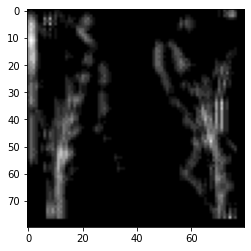

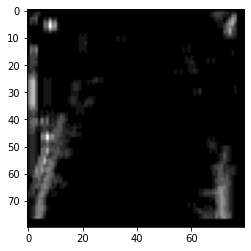

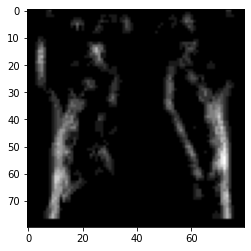

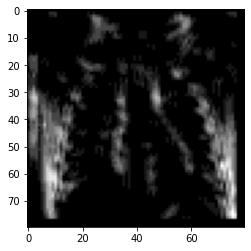

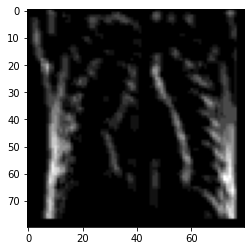

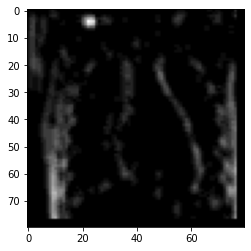

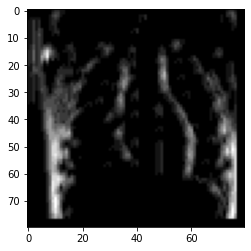

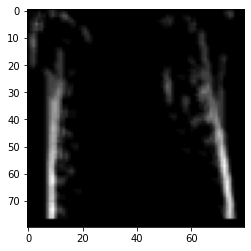

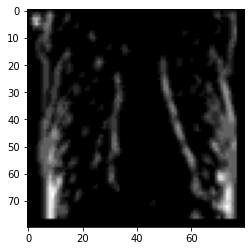

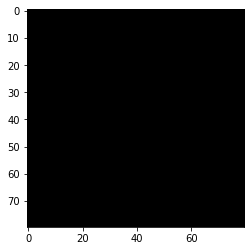

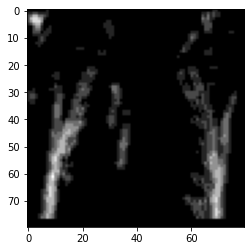

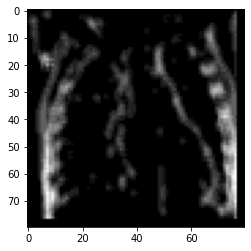

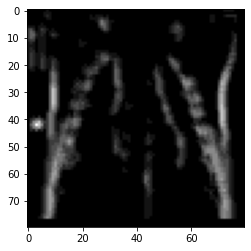

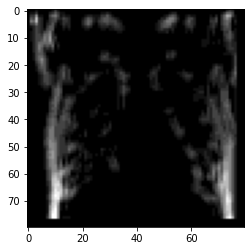

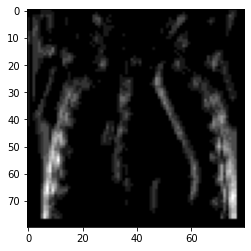

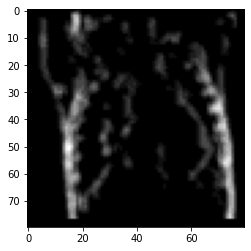

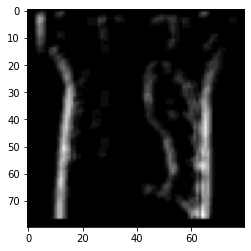

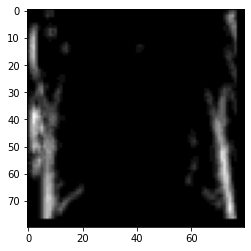

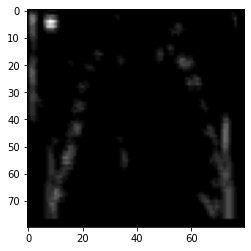

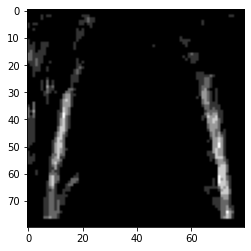

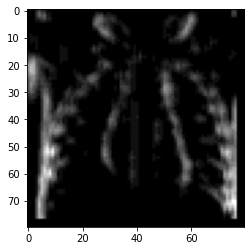

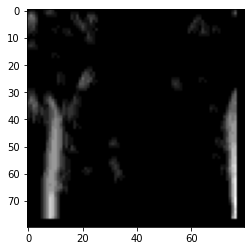

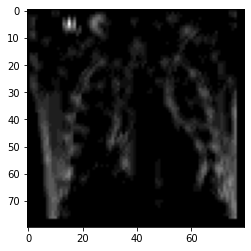

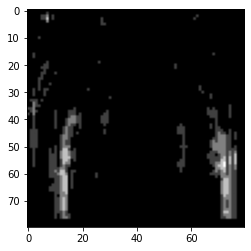

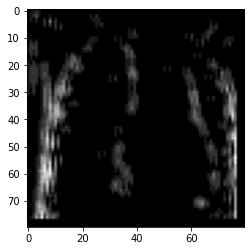

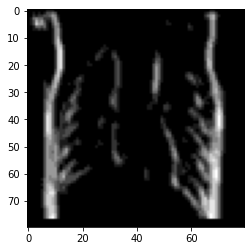

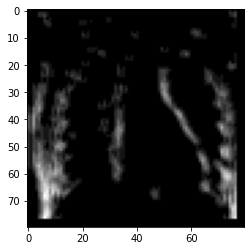

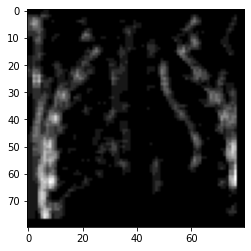

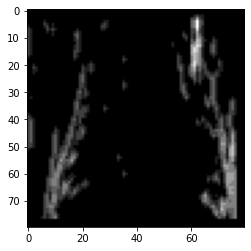

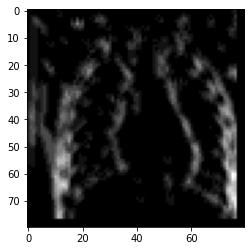

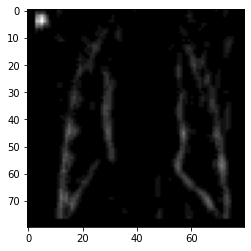

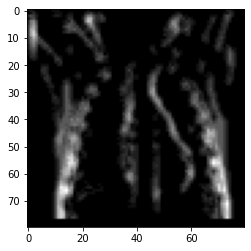

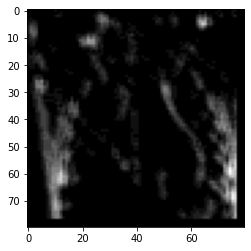

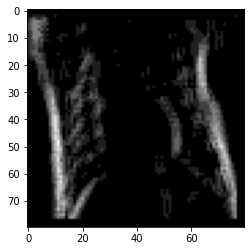

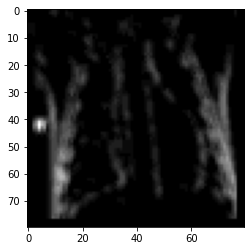

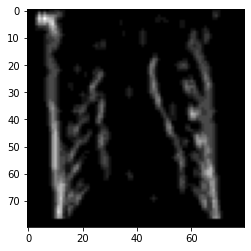

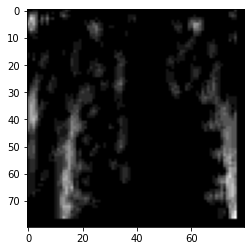

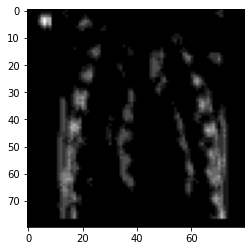

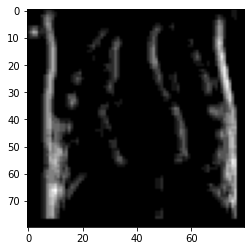

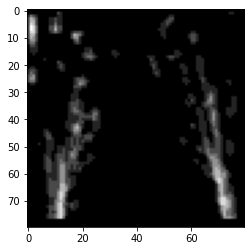

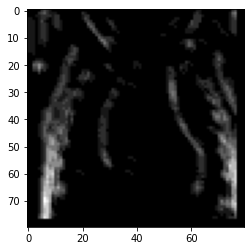

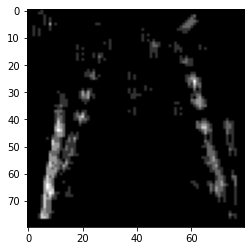

In [11]:
# Test image filters for training images.
print("Image Filters Training Images")
for i in range(len(L2Array_train)):
  if i%100 == 0:
    # print("i: ", i)
    show_image(L2Array_train[i])
'''
print("Image Filters Validation Images")
# Test image filters for validation images.
for i in range(len(L2Array_val)):
  if i%100 == 0:
    # print("i: ", i)
    show_image(L2Array_val[i])

print("Image Filters Testing Images")
# Test image filters for testing images.
for i in range(len(L2Array_test)):
  if i%100 == 0:
    # print("i: ", i)
    show_image(L2Array_test[i])
'''

## 5. Training.

After implementing the CNN model, the model is trained using the following functions below. The prediction functions are the forward propagation and backward propagation functions. Most of these functions were taken from [1] which while not a CNN implementation, is a Neural Network implementation from Scratch which is the goal of the training part of the Image Classification.  Furthermore, the loss function is computed using the mean squared error using the actual and predicted values [2].

In [12]:
# Derived from [1].
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/ m) + dZ2.dot(A1.T)
    db2 = (1/ m) + np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) + deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Derived from [1]. 
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


def init_params(X_length):
  '''
  While derived from [1] since this is a binary classification, a hidden layer
  will have 2 units of ReLU activation and the output layer will have 2 units. 
  Furthermore, X_length is defined as the input layer will correspond to 
  6400 units which is derived from the 80x80 downscaled image. X_length would 
  vary depending on the height and width of the image.
  '''
  print("X_length: ", X_length)
  W1 = np.random.randn(2, X_length) - 0.5
  b1 = np.random.randn(2, 1) - 0.5
  W2 = np.random.randn(2, 2) - 0.5
  b2 = np.random.randn(2, 1) - 0.5
  return W1, b1, W2, b2

# Derived from [1]. 
def get_predictions(A2): 
    return np.argmax(A2, 0)

# Derived from [1]. 
def get_accuracy(predictions, Y): 
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    '''
    Derived from [1]. This is utilized as the Optimizer. Furthermore, this 
    function will be utilized to compute the loss of the dataset.

    '''
    W1, b1, W2, b2 = init_params(len(X))
    mseiterations = []; ceiterations = []; # Will be used to plot loss.
    for i in range(iterations):
      Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
      dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
      W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
      A2predict = get_predictions(A2)
      # Compute Loss using Mean Squared Error [2].
      mse = mean_squared_error(Y, A2predict)
      mseiterations.append(mse)
      # Compute Loss using Cross Entropy Loss [2].
      ce = binary_cross_entropy(Y, A2predict)
      ceiterations.append(ce)
      if i % 10 == 0:
        print("Iteration: ", i)
        accuracy_iter = get_accuracy(get_predictions(A2), Y)*100
        print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    
    
    return mseiterations, ceiterations


def mean_squared_error(actual, predicted):
    ''' Function used to compute the loss for each iteration. The loss is based 
    on the mean squared error of the actual and predicted values [2]. '''
    sum_square_error = 0.0
    for i in range(len(actual)):
        sum_square_error += (actual[i] - predicted[i])**2
    mean_square_error = 1.0 / len(actual) * sum_square_error
    return mean_square_error

# calculate binary cross entropy
def binary_cross_entropy(actual, predicted):
    ''' Another Way to compute the loss for each iteration using
    cross entropy [2]. '''

    sum_score = 0.0
    for i in range(len(actual)):
      sum_score += actual[i] * log(1e-15 + predicted[i])
    mean_sum_score = 1.0 / len(actual) * sum_score
    return -mean_sum_score  # Note will return negative value.

# Derived from [1].   
def softmax(x):
    x_exp = np.exp(x-np.max(x))
    return x_exp/np.sum(x_exp,axis=0)

# Derived from [1]. 
def ReLU(Z):
    return np.maximum(Z, 0)

# Derived from [1]. 
def deriv_ReLU(Z):
    return Z > 0

# Derived from [1]. 
def forward_propagation(W1, b1, W2, b2, X):
     Z1 = W1.dot(X) + b1
     A1 = ReLU(Z1)
     Z2 = W2.dot(A1) + b2
     A2 = softmax(A1)
     return Z1, A1, Z2, A2

# Derived from [1]. 
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

[1] https://www.kaggle.com/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras

[2] https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

## 6. Evaluation. 

Evaluate the training models for accuracy and plot loss function.

In [13]:
print("Training Accuracy: ")
# Need to flatten and reshape L2Array_train data.
x_train = L2Array_train.flatten() 
x_train = np.reshape(x_train, ((train_x.shape[2]*train_x.shape[2]), train_x.shape[0]))
# Verify the shapes. This will be used when initializing the parameters.
print("train_x.shape: ", train_x.shape)
print("train_y.shape: ", train_y.shape)
# Train model and find accuracy and loss for training data.
train_losses_mse, train_losses_ce = gradient_descent(x_train, train_y, 100, 0.1)

# Same steps performed for Validation and test data.
print("Validation Accuracy: ")
x_val = L2Array_val.flatten()
x_val = np.reshape(x_val, ((val_x.shape[2]*val_x.shape[2]), val_x.shape[0]))
print("val_x.shape: ", val_x.shape)
print("val_y.shape: ", val_y.shape)
val_losses_mse, val_losses_ce  = gradient_descent(x_val, val_y, 100, 0.1)

print("Test Accuracy: ")
x_test = L2Array_test.flatten()
x_test = np.reshape(x_test, ((test_x.shape[2]*test_x.shape[2]), test_x.shape[0]))
print("test_x.shape: ", test_x.shape)
print("test_y.shape: ", test_y.shape)
test_losses_mse, test_losses_ce = gradient_descent(x_test, test_y, 100, 0.1)

print(train_x[1][1][:][:])

# After obtaining losses for both training and validation data, plot training 
# and validation loss for each epoch using both Mean Squared Error and 
# Cross Entropy. Here, iteration and epoch are used interchangeably.

# Plot loss with Mean Squared Error. 
print("Training and Validation Loss Graph using Mean Squared Error")
fig = plt.figure()
plt.plot(train_losses_mse, label='Training loss')
plt.plot(val_losses_mse, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title("Losses in Training Epochs using Mean Squared Error")
plt.legend()
plt.show()

# Plot loss with Cross Entropy. 
print("Training and Validation Loss Graph using Cross Entropy")
fig = plt.figure()
plt.plot(train_losses_ce, label='Training loss')
plt.plot(val_losses_ce, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title("Losses in Training Epochs using Cross Entropy")
plt.legend()
plt.show()




Training Accuracy: 
train_x.shape:  (4192, 1, 80, 80)
train_y.shape:  (4192,)
X_length:  6400
Iteration:  0
Accuracy:  0.25811068702290074
Iteration:  10
Accuracy:  0.25811068702290074


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in true_divide


Iteration:  20
Accuracy:  0.25811068702290074
Iteration:  30
Accuracy:  0.25811068702290074
Iteration:  40
Accuracy:  0.25811068702290074
Iteration:  50
Accuracy:  0.25811068702290074
Iteration:  60
Accuracy:  0.25811068702290074
Iteration:  70
Accuracy:  0.25811068702290074
Iteration:  80
Accuracy:  0.25811068702290074
Iteration:  90
Accuracy:  0.25811068702290074
Validation Accuracy: 
val_x.shape:  (1040, 1, 80, 80)
val_y.shape:  (1040,)
X_length:  6400
Iteration:  0
Accuracy:  0.2567307692307692
Iteration:  10
Accuracy:  0.2567307692307692
Iteration:  20
Accuracy:  0.2567307692307692
Iteration:  30
Accuracy:  0.2567307692307692
Iteration:  40
Accuracy:  0.2567307692307692
Iteration:  50
Accuracy:  0.2567307692307692
Iteration:  60
Accuracy:  0.2567307692307692
Iteration:  70
Accuracy:  0.2567307692307692
Iteration:  80
Accuracy:  0.2567307692307692
Iteration:  90
Accuracy:  0.2567307692307692
Test Accuracy: 
test_x.shape:  (624, 1, 80, 80)
test_y.shape:  (624,)
X_length:  6400
Itera

IndexError: ignored